In [1]:
import numpy as np
import pandas as pd
import xarray
import matplotlib.pyplot as plt
import seaborn as sns

from src.results.experiments import _DateExperimentLoader
from src.plot import orig_vs_transformed as plot_ovt
from src.data_loader import Shifted_Data_Loader

Using TensorFlow backend.


In [2]:

bg_fg = _DateExperimentLoader('2019-06-04')
# bg_only.load_configs()

# bg_fg = _DateExperimentLoader('2019-06-05')

bg_fg.load_configs()

configs = pd.DataFrame.from_records(bg_fg.configs)
configs.head()

# lg_ff.load()

,batch_size,bg_noise,dataset,dec_blocks,ecc_max,enc_arch,enc_blocks,enc_layers,epochs,label_corruption,...,project,recon,rot_max,run_dir,seed,uploaded_by,xcov,xent,y_dim,z_dim
0,512,0.30,fashion_mnist,"[4, 2, 1]",0.6,feedforward,NaN,"[3000, 2000, 500]",10,0.0,...,vae,0,0,/home/elijahc/projects/vae/logs/0729_101426_fa...,7,elijahc,0,15,35,35
1,512,0.10,fashion_mnist,"[4, 2, 1]",0.6,feedforward,NaN,"[3000, 2000, 500]",10,0.0,...,vae,0,0,/home/elijahc/projects/vae/logs/0701_145924_fa...,7,elijahc,0,15,35,35
2,512,0.05,fashion_mnist,"[4, 2, 1]",0.6,feedforward,NaN,"[3000, 2000, 500]",90,0.0,...,vae,0,0,/home/elijahc/projects/vae/logs/0701_145223_fa...,7,elijahc,0,15,35,35
3,512,0.60,fashion_mnist,"[4, 2, 1]",0.6,feedforward,NaN,"[3000, 2000, 500]",10,0.0,...,vae,0,0,/home/elijahc/projects/vae/logs/0702_093030_fa...,7,elijahc,0,15,35,35
4,512,0.00,fashion_mnist,"[4, 2, 1]",0.6,feedforward,NaN,"[3000, 2000, 500]",90,0.0,...,vae,0,0,/home/elijahc/projects/vae/logs/0701_112033_fa...,7,elijahc,0,15,35,35


In [3]:
dfs = pd.concat(bg_fg.load_performance()).reset_index().drop(columns=['index'])
dfs.head()

,ecc_max,label_corruption,recon,test_acc,xcov,xent,architecture,test_err
0,0.6,0,0,0.1000,0,15,only_xent,0.9000
1,0.6,0,0,0.1000,0,15,only_xent,0.9000
2,0.6,0,0,0.7514,0,15,only_xent,0.2486
3,0.6,0,0,0.1000,0,15,only_xent,0.9000
4,0.6,0,0,0.8314,0,15,only_xent,0.1686


In [4]:
model_subset = configs.query('bg_noise == 0.05').index.values
configs.iloc[model_subset]

,batch_size,bg_noise,dataset,dec_blocks,ecc_max,enc_arch,enc_blocks,enc_layers,epochs,label_corruption,...,project,recon,rot_max,run_dir,seed,uploaded_by,xcov,xent,y_dim,z_dim
2,512,0.05,fashion_mnist,"[4, 2, 1]",0.6,feedforward,NaN,"[3000, 2000, 500]",90,0.0,...,vae,0,0,/home/elijahc/projects/vae/logs/0701_145223_fa...,7,elijahc,0,15,35,35
7,512,0.05,fashion_mnist,"[4, 2, 1]",0.6,resnet-4,"[32, 64, 128, 256]","[500, 500]",10,0.0,...,vae,0,0,/home/elijahc/projects/vae/logs/0702_133328_fa...,7,elijahc,0,15,35,35
12,512,0.05,fashion_mnist,"[4, 2, 1]",0.6,feedforward,NaN,"[3000, 2000, 500]",10,0.0,...,vae,25,0,/home/elijahc/projects/vae/logs/0701_152033_fa...,7,elijahc,0,15,35,35
17,512,0.05,fashion_mnist,"[4, 2, 1]",0.6,resnet-4,"[32, 64, 128, 256]","[500, 500]",10,0.0,...,vae,25,0,/home/elijahc/projects/vae/logs/0702_115420_fa...,7,elijahc,0,15,35,35


In [5]:
dfs.iloc[model_subset]

,ecc_max,label_corruption,recon,test_acc,xcov,xent,architecture,test_err
2,0.6,0,0,0.7514,0,15,only_xent,0.2486
7,0.6,0,0,0.4712,0,15,only_xent,0.5288
12,0.6,0,25,0.7853,0,15,both,0.2147
17,0.6,0,25,0.8024,0,15,both,0.1976


In [6]:
def set_style():
    # This sets reasonable defaults for font size for
    # a figure that will go in a paper
    plt.style.use(['seaborn-white', 'seaborn-paper'])    
    
    # Set the font to be serif, rather than sans
    sns.set(font='serif')
    
    # Make the background white, and specify the
    # specific font family
    sns.set_style("whitegrid", 
                  {"font.family": "sans-serif",
                   "font.serif": ["Arial", "Helvetica"]}
                 )

In [7]:
configs[['enc_arch','rot_max','ecc_max','bg_noise','recon']]

,enc_arch,rot_max,ecc_max,bg_noise,recon
0,feedforward,0,0.6,0.30,0
1,feedforward,0,0.6,0.10,0
2,feedforward,0,0.6,0.05,0
3,feedforward,0,0.6,0.60,0
4,feedforward,0,0.6,0.00,0
5,resnet-4,0,0.6,0.30,0
6,resnet-4,0,0.6,0.10,0
7,resnet-4,0,0.6,0.05,0
8,resnet-4,0,0.6,0.60,0
9,resnet-4,0,0.6,0.00,0


In [8]:
DL = Shifted_Data_Loader(
    dataset='fashion_mnist',translation=0.6,rotation=None,flatten=False,seed=7,bg_only=False,noise_mode='uniform',
    noise_kws={'amount':0.3,'width':0.5},
                        )

input_shape:  (56, 56, 1)
dataset:  fashion_mnist
scale:  2
tx_max:  0.6
rot_max:  None
contrast_level:  1
noise_mode:  uniform
  width: 0.5
  amount: 0.3
creating noise uniform({'width': 0.5, 'amount': 0.3})...


train images:   0%|          | 0/60000 [00:00<?, ?it/s]

sx_train:  (60000, 56, 56, 1)
transforming: 


test_images:  29%|██▉       | 2908/10000 [00:00<00:00, 29072.40it/s]

making testing data...


test_images: 100%|██████████| 10000/10000 [00:00<00:00, 29061.28it/s]


adding noise to training set
adding noise to test set


In [9]:
cross_noise_params = [
    {'mode':'uniform','width':2,'amount':0.1},
    {'mode':'uniform','width':0.5},
    {'mode':'salt','amount':0.05},
    {'mode':'s&p','amount':0.05},
    {'mode':'gaussian','var':0.1**2},

#     {'mode':'uniform','width':0.3},
#     {'mode':'uniform','width':0.6}
#     {'mode':'gaussian','var':0.3**2},
#     {'mode':'salt', 'amount':0.3},
]
bg_noises = []
for kwargs in cross_noise_params:
    DL.regen_bg_noise(**kwargs)
    bg_noises.append(DL.bg_test)

creating noise uniform({'width': 2, 'amount': 0.1})...
creating noise uniform({'width': 0.5, 'amount': 1})...
creating noise salt({'amount': 0.05})...
creating noise s&p({'amount': 0.05})...
creating noise gaussian({'var': 0.010000000000000002})...


In [10]:
noise_params = [
    {'mode':'uniform','width':0.0},
    {'mode':'uniform','width':0.05},
    {'mode':'uniform','width':0.1},
    {'mode':'uniform','width':0.3},
    {'mode':'uniform','width':0.6}
#     {'mode':'salt', 'amount':0.3},
]


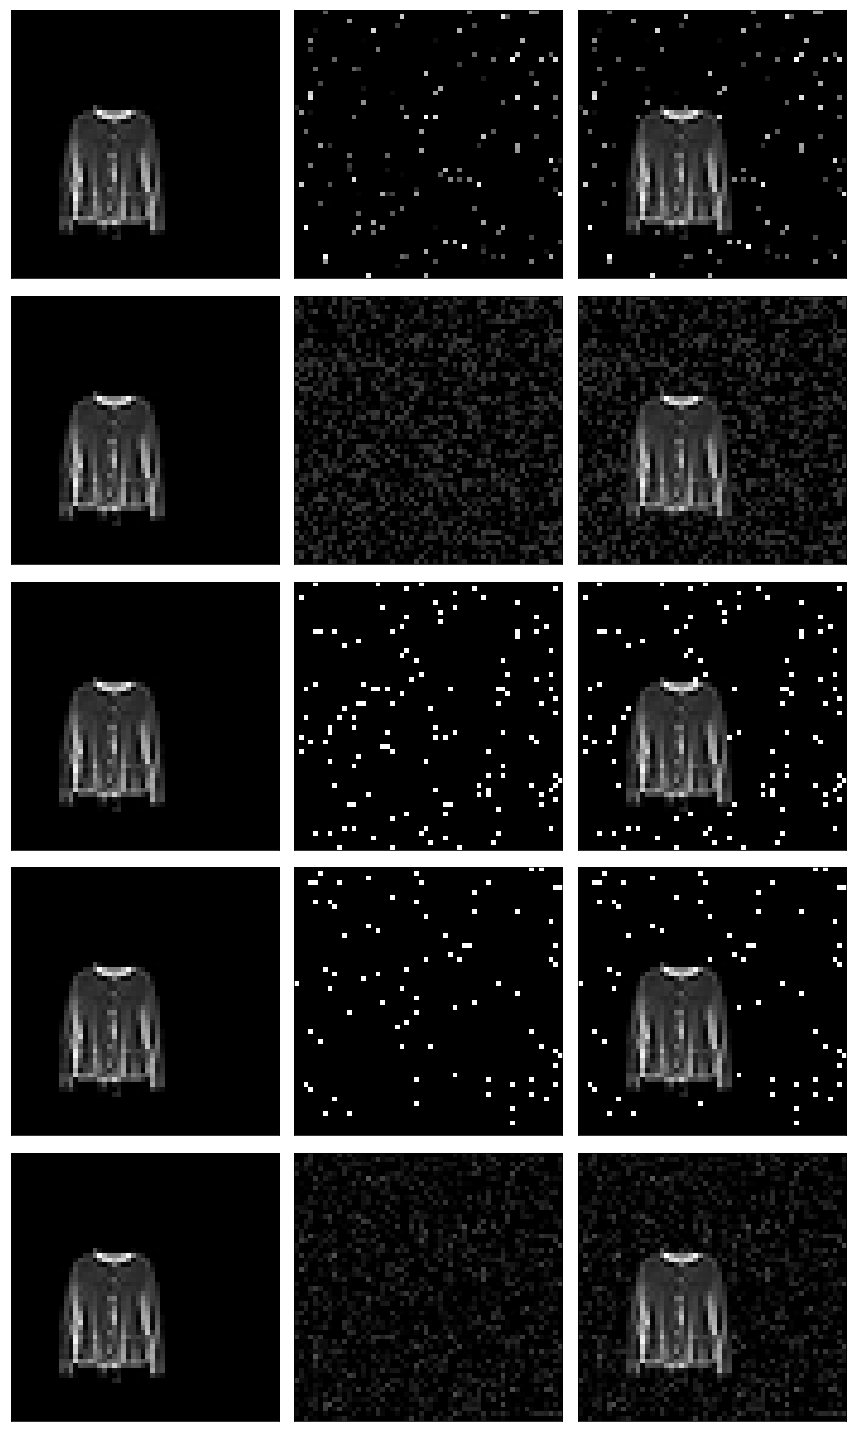

In [11]:
idx = 25

all_sxt_bg = [DL.fg_test.copy(),DL.fg_test.copy(),DL.fg_test.copy(),DL.fg_test.copy(),DL.fg_test.copy()]
all_sxt_fg = [DL.fg_test.copy(),DL.fg_test.copy(),DL.fg_test.copy(),DL.fg_test.copy(),DL.fg_test.copy()]

for sxt,sxt_fg,bg in zip(all_sxt_bg,all_sxt_fg,bg_noises):
    DL.add_noise(sxt, bg, DL.fg_mask_test, bg_only=True,)
    DL.add_noise(sxt_fg, noise_bg=bg, fg_mask=DL.fg_mask_test, bg_only=False)
    
# ims = [DL.fg_test[idx],noise_ims[idx],bg_noise[idx]]
fig,axs = plt.subplots(len(all_sxt_bg),3,figsize=(4*3,4*len(all_sxt_bg)))

for i in np.arange(len(all_sxt_bg)):
    ax = axs[i]
    ax[0].imshow(np.squeeze(DL.fg_test[idx]),vmin=0,vmax=1,cmap='gray')
    ax[1].imshow(np.squeeze(bg_noises[i][idx]),vmin=0,vmax=1,cmap='gray')
    ax[2].imshow(np.squeeze(all_sxt_bg[i][idx]),vmin=0,vmax=1,cmap='gray')
#     plt.colorbar()

for ax in axs.ravel():
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
plt.tight_layout()

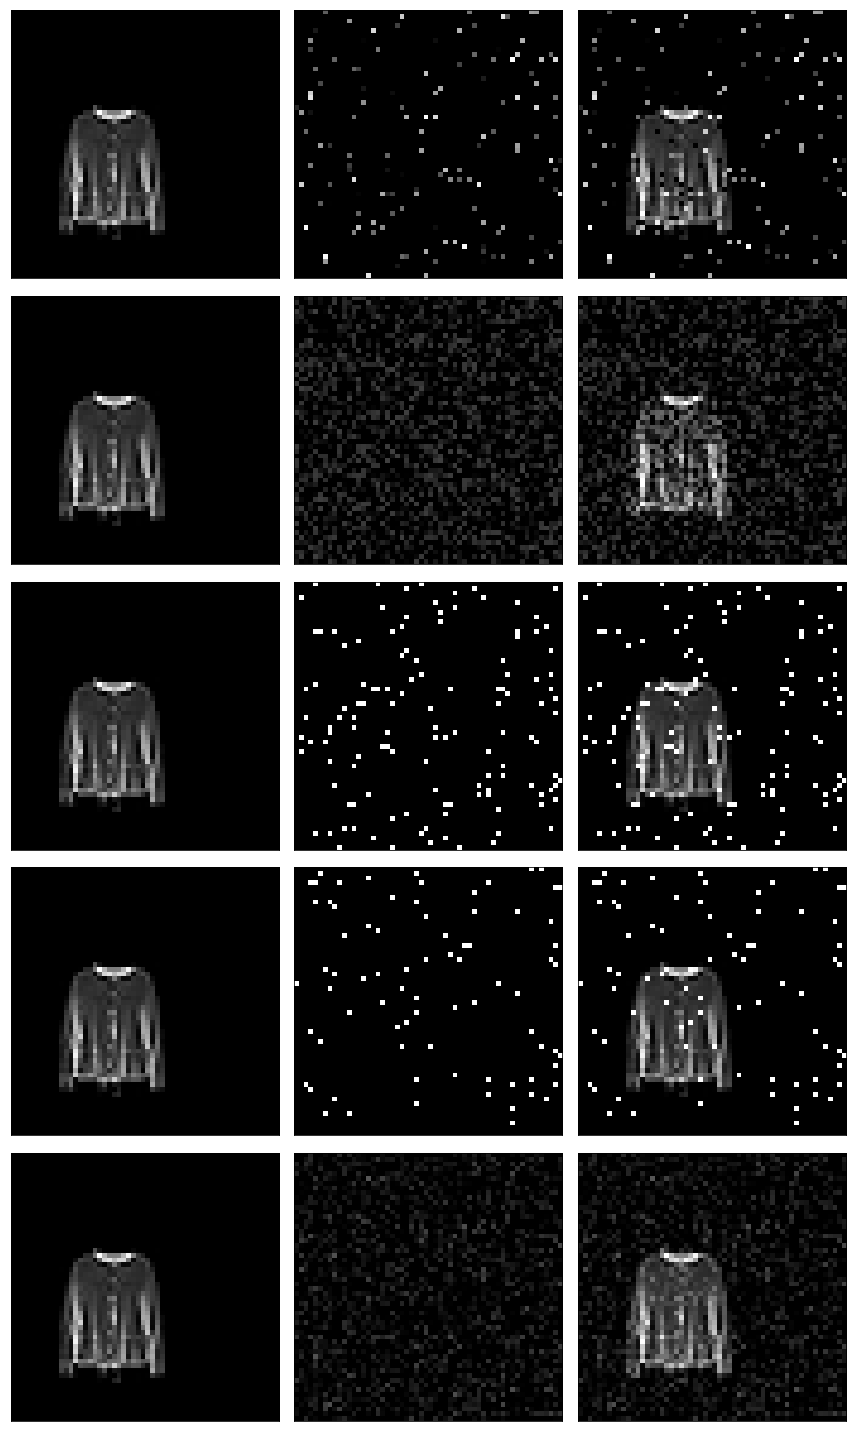

In [12]:
fig,axs = plt.subplots(len(all_sxt_fg),3,figsize=(4*3,4*len(all_sxt_fg)))

for i in np.arange(len(all_sxt_fg)):
    ax = axs[i]
    ax[0].imshow(np.squeeze(DL.fg_test[idx]),vmin=0,vmax=1,cmap='gray')
    ax[1].imshow(np.squeeze(bg_noises[i][idx]),vmin=0,vmax=1,cmap='gray')
    ax[2].imshow(np.squeeze(all_sxt_fg[i][idx]),vmin=0,vmax=1,cmap='gray')
    
for ax in axs.ravel():
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
plt.tight_layout()

In [13]:
flatten_arr = lambda X: X.reshape( (len(X), np.prod(X.shape[1:])) )

In [14]:
flatten_arr(DL.sx_test).shape

(10000, 3136)

In [15]:
def mod_eval(mod,x,y,flatten=False):
    if flatten:
        X = flatten_arr(x)
    else:
        X = x
    res = mod.evaluate(X,y,verbose=False)
    return res

In [16]:
noise_modes = ['uniform-5%','uniform','salt','s&p','gaussian']
amt = [0.05,1,0.05,0.05,1]
results = []
model_subset = configs.query('bg_noise == 0.05').index.values
for mod,conf_row,perf_row in zip(bg_fg.generate_classifiers(subset=model_subset),configs.loc[model_subset].iterrows(),dfs.iloc[model_subset].iterrows()):
    _,conf = conf_row
    _,perf = perf_row
    
#     print(conf)
    if conf.enc_arch == 'feedforward':
        flatten = True
    else:
        flatten = False
#     baseline_acc = mod_eval(mod,all_sxt_bg[0],DL.y_test_oh,flatten=flatten)[1]
    for bg,m,am in zip(all_sxt_bg,noise_modes,amt):
        res_partial = {}
        acc = mod_eval(mod,bg,DL.y_test_oh,flatten=flatten)
        res_partial['test_acc']=acc[1]
        res_partial['rel_test_acc']=acc[1]-perf.test_acc
        res_partial['noise_type']=m
        res_partial['noise_amount']=am
        res_partial['train_noise']=conf.bg_noise
        res_partial['enc_arch']=conf.enc_arch
        res_partial['recon']=conf.recon
        results.append(res_partial)

100%|██████████| 4/4 [00:40<00:00,  9.55s/it]


In [17]:
noise_df = pd.DataFrame.from_records(results)
# noise_df['rel_test_acc'] = test
noise_df

,enc_arch,noise_amount,noise_type,recon,rel_test_acc,test_acc,train_noise
0,feedforward,0.05,uniform-5%,0,-0.0803,0.6711,0.05
1,feedforward,1.00,uniform,0,-0.0472,0.7042,0.05
2,feedforward,0.05,salt,0,-0.1236,0.6278,0.05
3,feedforward,0.05,s&p,0,-0.0291,0.7223,0.05
4,feedforward,1.00,gaussian,0,-0.0094,0.7420,0.05
5,resnet-4,0.05,uniform-5%,0,-0.3702,0.1010,0.05
6,resnet-4,1.00,uniform,0,-0.3711,0.1001,0.05
7,resnet-4,0.05,salt,0,0.1738,0.6450,0.05
8,resnet-4,0.05,s&p,0,0.0706,0.5418,0.05
9,resnet-4,1.00,gaussian,0,-0.2681,0.2031,0.05


In [30]:
noise_modes = ['uniform-5%','uniform','salt','s&p','gaussian']
amt = [0.05,1,0.05,0.05,1]
fg_results = []
model_subset = configs.query('bg_noise == 0.05').index.values
for mod,conf_row in zip(bg_fg.generate_classifiers(subset=model_subset),configs.loc[model_subset].iterrows()):
    _,conf = conf_row
    _,perf = perf_row
#     print(conf)
    if conf.enc_arch == 'feedforward':
        flatten = True
    else:
        flatten = False
        
    baseline_acc = mod_eval(mod,all_sxt_fg[0],DL.y_test_oh,flatten=flatten)[1]
    for bg,m,am in zip(all_sxt_fg,noise_modes,amt):
        res_partial = {}
        acc = mod_eval(mod,bg,DL.y_test_oh,flatten=flatten)
        res_partial['test_acc']=acc[1]
        res_partial['rel_test_acc']=acc[1]-perf.test_acc
        res_partial['noise_type']=m
        res_partial['noise_amount']=am
        res_partial['train_noise']=conf.bg_noise
        res_partial['enc_arch']=conf.enc_arch
        res_partial['recon']=conf.recon
        fg_results.append(res_partial)

100%|██████████| 4/4 [01:01<00:00, 14.88s/it]


In [34]:
fg_noise_df = pd.DataFrame.from_records(fg_results)
fg_noise_df

,enc_arch,noise_amount,noise_type,recon,rel_test_acc,test_acc,train_noise
0,feedforward,0.05,uniform-5%,0,-0.1343,0.6681,0.05
1,feedforward,1.00,uniform,0,-0.1009,0.7015,0.05
2,feedforward,0.05,salt,0,-0.1546,0.6478,0.05
3,feedforward,0.05,s&p,0,-0.0767,0.7257,0.05
4,feedforward,1.00,gaussian,0,-0.0484,0.7540,0.05
5,resnet-4,0.05,uniform-5%,0,-0.7023,0.1001,0.05
6,resnet-4,1.00,uniform,0,-0.7024,0.1000,0.05
7,resnet-4,0.05,salt,0,-0.2882,0.5142,0.05
8,resnet-4,0.05,s&p,0,-0.3339,0.4685,0.05
9,resnet-4,1.00,gaussian,0,-0.6338,0.1686,0.05


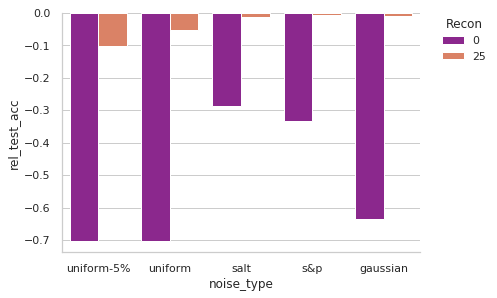

In [37]:
set_style()
fig,ax = plt.subplots(1,1)
g = sns.barplot(x='noise_type',y='rel_test_acc',hue='recon',palette='plasma',
             data=fg_noise_df.query('enc_arch == "resnet-4"'))
ax.legend(title='Recon',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine(ax=ax)

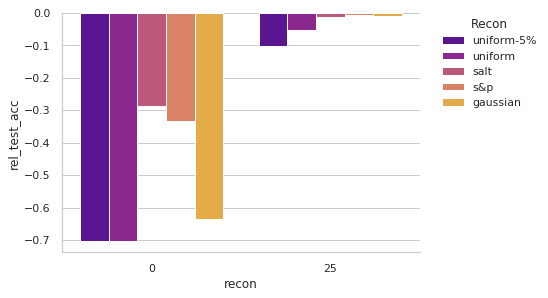

In [47]:
set_style()
fig,ax = plt.subplots(1,1)
g = sns.barplot(x='recon',y='rel_test_acc',hue='noise_type',palette='plasma',
             data=fg_noise_df.query('enc_arch == "resnet-4"'))
ax.legend(title='Recon',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# ax.set_ylim(-0.7,0)
sns.despine(ax=ax)



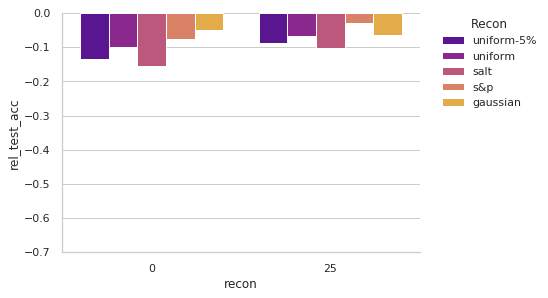

In [48]:
sns.set(font_scale=2)
set_style()
fig,ax = plt.subplots(1,1)
sns.barplot(x='recon',y='rel_test_acc',hue='noise_type',palette='plasma',ax=ax,
             data=fg_noise_df.query('enc_arch == "feedforward"'))

ax.legend(title='Recon',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_ylim(-0.7,0)
sns.despine(ax=ax)

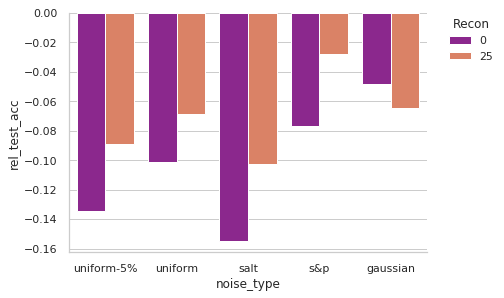

In [40]:
sns.set(font_scale=2)
set_style()
fig,ax = plt.subplots(1,1)
sns.barplot(x='noise_type',y='rel_test_acc',hue='recon',palette='plasma',ax=ax,
             data=fg_noise_df.query('enc_arch == "feedforward"'))

ax.legend(title='Recon',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine(ax=ax)

In [24]:
noise_df.query('noise_type == "gaussian"').test_acc.values

array([0.742 , 0.2031, 0.7238, 0.7945])

In [25]:
history = bg_fg.load_history()
hist_df = pd.concat(history)

In [26]:
hist_max = hist_df.groupby(['enc_arch','objective_type','bg_noise']).max().reset_index()

In [27]:
hist_max['gaussian_test_acc']=noise_df.query('noise_type == "gaussian"').test_acc.values
hist_max['salt_test_acc']=noise_df.query('noise_type == "salt"').test_acc.values

ValueError: Length of values does not match length of index

In [ ]:
hist_max.head()

In [ ]:
def plot_fg(DL,index=None,cmap='gray',clean=True):
    X = DL.x_test
    sX = DL.fg_test
    
    if index is None:
        idxs = np.random.randint(0,len(X)/10,size=10)
    
    
    im_scale = 3  
    n_rows=2
    n_cols=10
    figure,axs = plt.subplots(n_rows,n_cols,figsize=(n_cols*im_scale,n_rows*im_scale))
    rand_class = 9
    for ax_col,idx,m in zip(np.swapaxes(axs,0,1),idxs,reversed(cls_masks)):
        ax_col[0].imshow(X[m][idx].squeeze(),cmap=cmap)
#         ax_row[1].imshow(sX[m][idx].squeeze(),cmap=cmap)
        ax_col[1].imshow(sX[cls_masks[rand_class]][idx].squeeze(),cmap=cmap)
    
    if clean:
        for ax in np.ravel(axs):
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
#             axs[1].get_xaxis().set_visible(False)
#             axs[1].get_yaxis().set_visible(False)
        plt.tight_layout()
    
    return (idxs)

In [ ]:
sns.set_context('talk')
# bg_noise = [0,0.05,0.1,0.6]
fig,axs = plt.subplots(2,1,figsize=(6,2*4),sharey=True,subplot_kw={'ylim':(0,1),'xlim':(0,1.5)})

for obj,ax in zip(['only_xent','both'],axs):
#     for ax,bg_n,i in zip(ax_row,bg_noise,np.arange(len(bg_noise))):
#     sns.barplot(x='objective_type',y='val_class_acc',data=hist_max.query('bg_noise == {} & enc_arch == "feedforward"'.format(bg_n)),ax=ax)
    ax.set_title('{}'.format(obj))
    ax.set_ylabel('')
    ax.hlines(0.1,-0.5,6,linestyles='dashed',label='chance')
    sns.barplot(x='bg_noise',y='salt_test_acc',data=hist_max.query('enc_arch == "feedforward" & objective_type == "{}"'.format(obj)),ax=ax,palette='magma')
    
#     plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#     if i < 3:
#         pass
# #         ax.get_xaxis().set_visible(False)
        
        
plt.tight_layout()

In [ ]:
sns.set_context('talk')
# bg_noise = [0,0.05,0.1,0.6]
fig,axs = plt.subplots(2,1,figsize=(6,2*4),sharey=True,subplot_kw={'ylim':(0,1),'xlim':(0,1.5)})

for obj,ax in zip(['only_xent','both'],axs):
#     for ax,bg_n,i in zip(ax_row,bg_noise,np.arange(len(bg_noise))):
#     sns.barplot(x='objective_type',y='val_class_acc',data=hist_max.query('bg_noise == {} & enc_arch == "feedforward"'.format(bg_n)),ax=ax)
    ax.set_title('{}'.format(obj))
    ax.set_ylabel('')
    ax.hlines(0.1,-0.5,6,linestyles='dashed',label='chance')
    sns.barplot(x='bg_noise',y='salt_test_acc',data=hist_max.query('enc_arch == "convnet-4" & objective_type == "{}"'.format(obj)),ax=ax,palette='magma')
    
#     plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#     if i < 3:
#         pass
# #         ax.get_xaxis().set_visible(False)
        
        
plt.tight_layout()

In [ ]:
sns.set_context('talk')
# bg_noise = [0,0.05,0.1,0.6]
fig,axs = plt.subplots(2,1,figsize=(6,2*4),sharey=True,subplot_kw={'ylim':(0,1),'xlim':(0,1.5)})

for obj,ax in zip(['only_xent','both'],axs):
#     for ax,bg_n,i in zip(ax_row,bg_noise,np.arange(len(bg_noise))):
#     sns.barplot(x='objective_type',y='val_class_acc',data=hist_max.query('bg_noise == {} & enc_arch == "feedforward"'.format(bg_n)),ax=ax)
    ax.set_title('{}'.format(obj))
    ax.set_ylabel('')
    ax.hlines(0.1,-0.5,6,linestyles='dashed',label='chance')
    sns.barplot(x='bg_noise',y='val_class_acc',data=hist_max.query('enc_arch == "feedforward" & objective_type == "{}"'.format(obj)),ax=ax,palette='magma')
    
#     plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#     if i < 3:
#         pass
# #         ax.get_xaxis().set_visible(False)
        
        
plt.tight_layout()

In [ ]:
sns.set_context('talk')
# bg_noise = [0,0.05,0.1,0.6]
fig,axs = plt.subplots(2,1,figsize=(6,2*4),sharey=True,subplot_kw={'ylim':(0,1),'xlim':(0,1.5)})

for obj,ax in zip(['only_xent','both'],axs):
#     for ax,bg_n,i in zip(ax_row,bg_noise,np.arange(len(bg_noise))):
#     sns.barplot(x='objective_type',y='val_class_acc',data=hist_max.query('bg_noise == {} & enc_arch == "feedforward"'.format(bg_n)),ax=ax)
    ax.set_title('{}'.format(obj))
    ax.set_ylabel('')
    ax.hlines(0.1,-0.5,6,linestyles='dashed',label='chance')
    sns.barplot(x='bg_noise',y='val_class_acc',data=hist_max.query('enc_arch == "convnet-4" & objective_type == "{}"'.format(obj)),ax=ax,palette='magma')
    
#     plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#     if i < 3:
#         pass
# #         ax.get_xaxis().set_visible(False)
        
        
plt.tight_layout()

In [ ]:
sns.set_context('talk')
fig,axs = plt.subplots(1,4,figsize=(4*3,4),sharex=True,sharey=True,subplot_kw={'ylim':(0,1),'xlim':(0,1.5)})
bg_noise = [0.05,0.1,0.6]
for ax,bg_n,i in zip(axs,bg_noise,np.arange(4)):
    sns.barplot(x='objective_type',y='val_class_acc',data=hist_max.query('bg_noise == {} & enc_arch == "resnet-4"'.format(bg_n)),ax=ax)
    if i < 3:
        ax.get_xaxis().set_visible(False)
    ax.set_title('{}%'.format(bg_n*100))
    ax.set_ylabel('')
    ax.hlines(0.1,-0.5,1.5,linestyles='dashed',label='chance')
        
plt.tight_layout()

In [ ]:
sns.barplot(x='bg_noise',y='val_class_acc',hue='objective_type',data=hist_max.query('enc_arch == "resnet-4"'))

In [ ]:
def arch_train_plot():
    fig,axs = plt.subplots(2,1,sharex=True,sharey=True)

    filts = [
        "enc_arch == 'feedforward' & objective_type == '{}'".format('both'),
        "enc_arch == 'feedforward' & objective_type == '{}'".format('only_xent'),
#         "enc_arch == 'resnet-4' & bg_noise == {}".format(bg_noise),
    ]

    for filt,ax in zip(filts,axs):
        df = hist_df.query(filt)
        sns.lineplot(x='epoch',y='val_class_acc',hue='bg_noise',data=df,ax=ax,legend='full')

In [ ]:
arch_train_plot()

In [ ]:
sns.lineplot(x='epoch',y='val_class_acc',hue='objective_type',data=hist_df.query("enc_arch == 'resnet-4' & bg_noise == 0.25"))

In [ ]:
configs.groupby(['enc_arch','bg_noise']).count()